In [1]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
from collections import OrderedDict
import datetime
import time
import matplotlib.pyplot as plt
from etf_tools import kd_rsv, ez_plot, candle_stick, rsi, ema, macd, atr_std, vr_obv, trend

plt.style.use('ggplot')
plt.ioff()

In [4]:
!cat data/read_df_demo.py

import pandas as pd
from collections import OrderedDict
from IPython.display import display, Markdown


csv_files = ['tetfp.csv', 'tsharep.csv', 'tasharep.csv', 'taetfp.csv']
col_dtypes = OrderedDict(code=str, date=str, name=str, open=float, high=float, low=float, close=float, volume=int)


def head(df: pd.DataFrame, n_rows:int=1) -> None:
    """Pretty-print the head of a Pandas table in a Jupyter notebook and show its dimensions."""
    display(df.head(n_rows))


if __name__ == '__main__':
    for f in csv_files:
        try:
            df = pd.read_csv(f, names=col_dtypes.keys(), dtype=col_dtypes, skiprows=1)
            head(df, n_rows=5)
            print(f'[TEST-OK] Read from {f}')
        except Exception as err:
            print(f'[ERROR] {err}')



In [2]:
data_dir = '../data/raw/'
csv_files = ['tetfp.csv', 'tsharep.csv', 'tasharep.csv', 'taetfp.csv']
col_dtypes = OrderedDict(code=str, date=str, name=str, open=float, high=float, low=float, close=float, volume=int)

tetfp = pd.read_csv(os.path.join(data_dir, 'tetfp.csv'), names=col_dtypes.keys(), dtype=col_dtypes, skiprows=1)

print(tetfp.shape, len(tetfp.code.unique()))
etf0050 = tetfp[tetfp['code'] == '0050']
etf0050.head()

(19307, 8) 18


,code,date,name,open,high,low,close,volume
0,0050,20130102,元大台灣50,54.00,54.65,53.90,54.40,16487
1,0050,20130103,元大台灣50,54.90,55.05,54.65,54.85,29020
2,0050,20130104,元大台灣50,54.85,54.85,54.40,54.50,9837
3,0050,20130107,元大台灣50,54.55,54.55,53.90,54.25,8910
4,0050,20130108,元大台灣50,54.00,54.20,53.65,53.90,12507


In [53]:
tetfp.close[-5:].values.shape

# pd.concat([tetfp[-1:].date.values, tetfp.loc[:0][['open', 'high', 'low', 'close']].values], axis=1)
# np.concatenate((tetfp[-1:].date.values.flatten(), tetfp.loc[:0][['open', 'high', 'low', 'close']].values.flatten()))

(5,)

In [4]:
feat_trend = trend(etf0050.close)
display(feat_trend.tail())

,trend_up,trend_down
1312,0,0
1313,0,0
1314,0,0
1315,0,0
1316,0,0


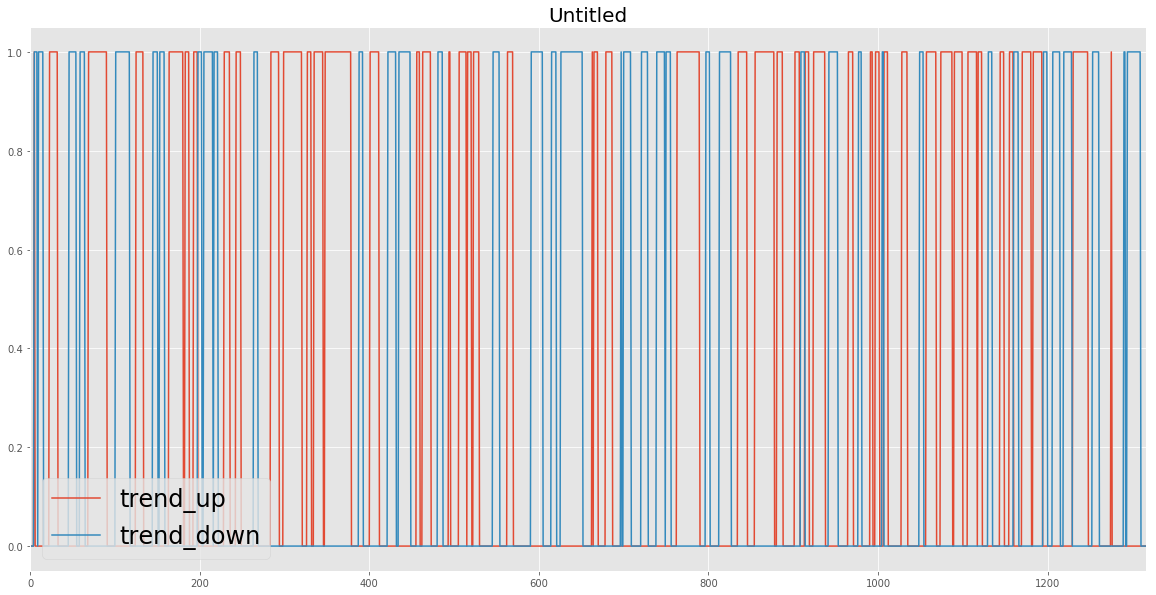

In [7]:
ez_plot(feat_trend, legend_prop={'loc': 'lower left', 'fontsize': 24})

In [28]:
# pd.Series(tetfp.date.unique()).to_csv('ETF_DATE', index=False)
# pd.Series(tetfp.code.unique()).to_csv('ETF_CODE', index=False)

,vr,obv,obv_ma12,obv_ma12_diff
0,3.000000,16487,16487.000000,0.000000
1,3.000000,45507,30997.000000,14510.000000
2,1.950972,35670,32554.666667,3115.333333
3,1.526005,26760,31106.000000,-4346.000000
4,1.204683,14253,27735.400000,-13482.400000


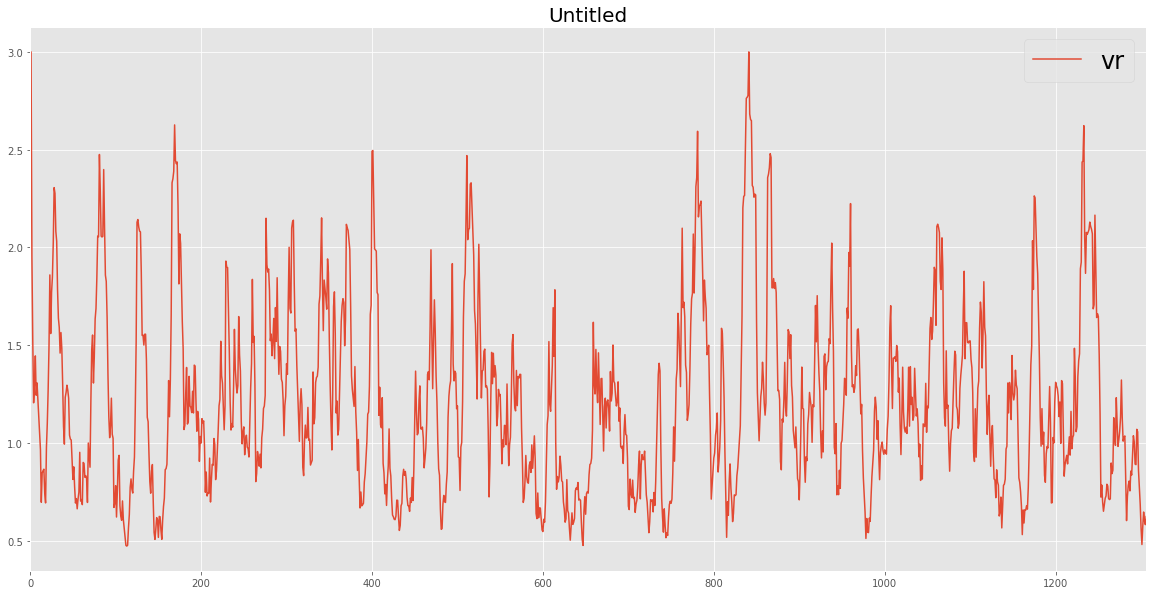

In [14]:
feat_vr_obv = vr_obv(etf0050.close, volume=etf0050.volume)
display(feat_vr_obv.head())

ez_plot(pd.concat([feat_vr_obv[['vr']]], axis=1))

In [3]:
feat_atr_std = atr_std(etf0050.close, high=etf0050.high, low=etf0050.low)
feat_atr_std.head()

,price_std_20,atr_20,atr_std_20
0,0.0,0.750000,1.125000
1,0.0,0.733500,1.100250
2,0.0,0.694945,1.042417
3,0.0,0.671863,1.007795
4,0.0,0.654748,0.982122


In [13]:
feat_kd_rsv = kd_rsv(etf0050.close, high=etf0050.high, low=etf0050.low)
feat_kd_rsv.head()

,rsv,k,d
0,0.666667,0.500000,0.500000
1,0.826087,0.607609,0.535511
2,0.521739,0.579272,0.549952
3,0.304348,0.488547,0.529688
4,0.178571,0.386255,0.482355


In [12]:
feat_candle_stick = candle_stick(open_price=etf0050.open,
                                 close_price=etf0050.close,
                                 high=etf0050.high, low=etf0050.low)
feat_candle_stick.head()

,kbody,kbody_top,kbody_bottom,up_shadow,low_shadow,open_gap
0,0.40,54.40,54.00,0.25,0.10,0.00
1,-0.05,54.90,54.85,0.15,0.20,0.50
2,-0.35,54.85,54.50,0.00,0.10,0.00
3,-0.30,54.55,54.25,0.00,0.35,0.05
4,-0.10,54.00,53.90,0.20,0.25,-0.25


In [3]:
feat_rsi = rsi(etf0050.close)
feat_rsi.head()

,upward,downward,rs,rsi
0,0.000000,-0.000000,0.500000,0.333333
1,0.064286,-0.000000,1.000000,0.500000
2,0.064286,0.050000,0.562500,0.360000
3,0.064286,0.085714,0.428571,0.300000
4,0.064286,0.135714,0.321429,0.243243


In [10]:
ema12 = ema(etf0050.close, n_days=12)
ema26 = ema(etf0050.close, n_days=26)

display(ema12.head())
display(ema26.head())

0    54.400000
1    54.469231
2    54.473964
3    54.439508
4    54.356507
Name: ema12, dtype: float64

0    54.400000
1    54.433333
2    54.438272
3    54.424326
4    54.385487
Name: ema26, dtype: float64

In [3]:
feat_macd = macd(etf0050.close)
feat_macd.head()

,dif,macd,osc
0,0.000000,0.000000,0.000000
1,0.035897,0.007179,0.028718
2,0.035693,0.012882,0.022811
3,0.015183,0.013342,0.001841
4,-0.028980,0.004878,-0.033857


In [9]:
# ez_plot(pd.concat([etf0050.close, ema12, ema26], axis=1))

In [8]:
# ez_plot(feat_rsi[['upward', 'downward']])

In [7]:
# ez_plot(feat_macd)

In [10]:
import random


In [11]:
def foo(a, b):
    
    def draw():
        return random.randint(a, b)
    
    return draw

In [65]:
z = {f'{s}': d for s, d in zip('abc', [1,2,3])} # for d in [1, 2, 3, 4]]

In [66]:
a = []

In [70]:
a.append(z.copy())

In [71]:
a

[{'a': 1, 'b': 2, 'c': 3},
 {'a': 1, 'b': 2, 'c': 3},
 {'a': 1, 'b': 2, 'c': 3},
 {'a': 1, 'b': 2, 'c': 3}]

In [78]:
x = pd.DataFrame(a).T
x.head()

,0,1,2,3
a,1,1,1,1
b,2,2,2,2
c,3,3,3,3


In [79]:
x.columns = [f'stacking_{i + 1}' for i in range(len(a))]